In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier,
    ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier

In [3]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('../data/processed/data_cleaned.csv')

X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(verbose=-1, random_state=42),
    'CatBoost': CatBoostClassifier(learning_rate=0.1, iterations=500, depth=6, silent=True, random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Voting': VotingClassifier(estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ], voting='hard'),
    'Gaussian Process': GaussianProcessClassifier(random_state=42)
}

In [5]:
# Dictionary to store models and performance
results = {}

# Train and evaluate each model
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Store performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Save the results
    results[name] = {
        'accuracy': accuracy,
        'classification_report': report
    }


# Compile results into a DataFrame
results_df = pd.DataFrame.from_dict({
    name: {
        'Accuracy': res['accuracy'],
        'Precision': res['classification_report']['weighted avg']['precision'],
        'Recall': res['classification_report']['weighted avg']['recall'],
        'F1-Score': res['classification_report']['weighted avg']['f1-score']
    }
    for name, res in results.items()
}, orient='index')


# Train and evaluate ANN
print("Training ANN...")
ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)


# Evaluate ANN
ann_loss, ann_accuracy = ann.evaluate(X_test, y_test, verbose=0)
ann_report = classification_report(y_test, y_pred, output_dict=True)
results['ANN'] = {
    'accuracy': ann_accuracy,
    'classification_report': ann_report
}


# Train and evaluate MLPClassifier
print("Training MLPClassifier...")
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)


# Make predictions
y_pred_mlp = mlp.predict(X_test)


# Store performance metrics for MLPClassifier
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_report = classification_report(y_test, y_pred_mlp, output_dict=True)
results['MLPClassifier'] = {
    'accuracy': mlp_accuracy,
    'classification_report': mlp_report
}


# Compile results into a DataFrame
results_df = pd.DataFrame.from_dict({
    name: {
        'Accuracy': res['accuracy'],
        'Precision': res['classification_report']['weighted avg']['precision'],
        'Recall': res['classification_report']['weighted avg']['recall'],
        'F1-Score': res['classification_report']['weighted avg']['f1-score']
    }
    for name, res in results.items()
}, orient='index')


print("Training completed")

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
Training CatBoost...
Training SVM...
Training k-NN...
Training Naive Bayes...
Training AdaBoost...
Training Bagging...
Training Extra Trees...
Training Voting...
Training Gaussian Process...
Training ANN...
Training MLPClassifier...
Training completed


In [6]:
# Display results
print("\nModel Comparison Results")
results_df


Model Comparison Results


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.991228,0.991494,0.991228,0.991269
Decision Tree,0.947368,0.947368,0.947368,0.947368
Random Forest,0.982456,0.983488,0.982456,0.982614
Gradient Boosting,0.973684,0.975940,0.973684,0.974028
XGBoost,0.973684,0.974108,0.973684,0.973806
LightGBM,0.973684,0.973613,0.973684,0.973555
CatBoost,0.982456,0.983488,0.982456,0.982614
SVM,0.991228,0.991494,0.991228,0.991269
k-NN,0.964912,0.966241,0.964912,0.965227
Naive Bayes,0.964912,0.966544,0.964912,0.964160


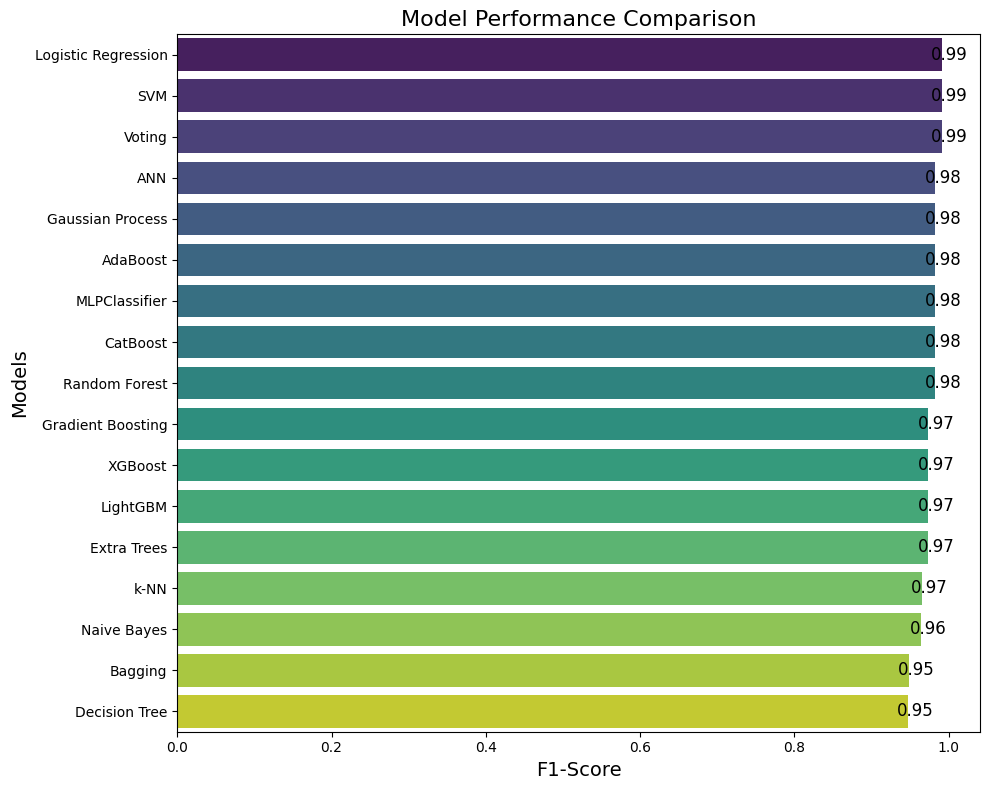

In [7]:
F1_df = results_df['F1-Score']
model_names = results_df.index

# Sort the data by F1-Score in desc order
sorted_data = F1_df.sort_values(ascending=False)

# Seaborn barplot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=sorted_data, y=sorted_data.index, palette="viridis")

# Add titles and labels
plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("F1-Score", fontsize=14)
plt.ylabel("Models", fontsize=14)
plt.tight_layout()

# Add F1 scores as labels on the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01, p.get_y() + p.get_height() / 2,
            f'{width:.2f}',
            ha='center', va='center', fontsize=12)

plt.show()

In [8]:
# Create models dir
os.makedirs('../models', exist_ok=True)

# Save models with F1-Score > 96
top_models = [model_name for model_name in sorted_data.index 
              if model_name not in ["MLPClassifier", "ANN"] and sorted_data[model_name] > 0.96]

for model_name in top_models:
    # Convert model name to lowercase with underscores
    sanitized_name = model_name.lower().replace(" ", "_")
    
    # Get the model object from the classifiers dictionary
    model_object = classifiers.get(model_name)
    
    # Save the model
    if model_object:
        filepath = f'../models/{sanitized_name}.pkl'
        joblib.dump(model_object, filepath)
        print(f"Saved {model_name} as {filepath}")
    else:
        print(f"Model {model_name} not found in classifiers dictionary.")

# Save MLPClassifier
mlp_filepath = '../models/mlp_classifier.pkl'
joblib.dump(mlp, mlp_filepath)
print(f"Saved MLPClassifier as {mlp_filepath}")

# Save ANN
ann_filepath = '../models/ann_model.h5'
ann.save(ann_filepath)
print(f"Saved ANN as {ann_filepath}")

Saved Logistic Regression as ../models/logistic_regression.pkl
Saved SVM as ../models/svm.pkl
Saved Voting as ../models/voting.pkl
Saved Gaussian Process as ../models/gaussian_process.pkl
Saved AdaBoost as ../models/adaboost.pkl
Saved CatBoost as ../models/catboost.pkl
Saved Random Forest as ../models/random_forest.pkl
Saved Gradient Boosting as ../models/gradient_boosting.pkl
Saved XGBoost as ../models/xgboost.pkl
Saved LightGBM as ../models/lightgbm.pkl
Saved Extra Trees as ../models/extra_trees.pkl
Saved k-NN as ../models/k-nn.pkl
Saved Naive Bayes as ../models/naive_bayes.pkl
Saved MLPClassifier as ../models/mlp_classifier.pkl


Saved ANN as ../models/ann_model.h5


In [10]:
# Save F1 scores
F1_df.to_csv('F1_scores.csv', index=False)